Unsupervised Learning
====

The customer segments data is included as a selection of 440 data points collected on data found from clients of a wholesale distributor in Lisbon, Portugal. More information can be found on the UCI Machine Learning Repository.

Note (m.u.) is shorthand for monetary units.

Features:
- 1) Fresh: annual spending (m.u.) on fresh products (Continuous)
- 2) Milk: annual spending (m.u.) on milk products (Continuous)
- 3) Grocery: annual spending (m.u.) on grocery products (Continuous)
- 4) Frozen: annual spending (m.u.) on frozen products (Continuous)
- 5) Detergents_Paper: annual spending (m.u.) on detergents and paper - products (Continuous)
- 6) Delicatessen: annual spending (m.u.) on and delicatessen products (Continuous)
- 7) Channel: {Hotel/Restaurant/Cafe - 1, Retail - 2} (Nominal)
- 8) Region: {Lisbon - 1, Oporto - 2, or Other - 3} (Nominal)

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with.

## Getting Started

In [1]:
# Import necessary libraries: pandas, numpy, matplotlib, seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid") # white, whitegrid, dark, darkgrid, ticks

In [90]:
# Read dataset
# For the purposes of this project, the features 'Channel' and 'Region' will be excluded in the analysis — 
# with focus instead on the six product categories recorded for customers.

# import dataset
data = pd.read_csv('customers.csv')

# drop columns Channel and Region
data = data.drop(columns=['Channel', 'Region'])

## Data Exploration

In [91]:
# Let's take a look at dataset
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [22]:
# How many observations are in this data set?
# Is there any missing value?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(6)
memory usage: 20.7 KB


In [23]:
#descriptive statistics of the dataset
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Visualization: Purchase Behavior

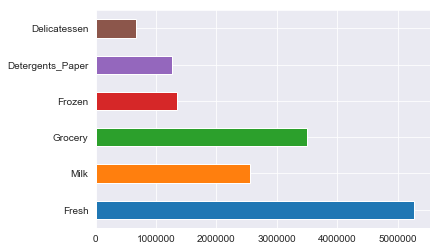

In [24]:
# The dataset is composed of six important product categories: 
# 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', and 'Delicatessen'. 
# Consider what each category represents in terms of products you could purchase.

# Plot total purchases on each product categories
data.sum().plot(kind='barh')

#### What is distribution of Total Purchases of each person

In [87]:
total_purch = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']

In [88]:
# Calculate total purchases
# Hint: sum by columns

data[total_purch] = data[total_purch].div(data[total_purch].sum(axis=1),axis=0).multiply(100)
data.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,37.139423,28.306754,22.165220,0.627345,7.838884,3.922373
1,21.213852,29.489569,28.762099,5.296699,9.898996,5.338784
2,17.353182,24.059000,20.988801,6.569243,9.603933,21.425840
3,48.446003,4.367992,15.415799,23.388481,1.851649,6.530076
4,49.056399,11.735358,15.613883,8.492408,3.854664,11.247289


In [14]:
# Number of row in dataset
nrows = data.shape[0]
print(nrows)

440


In [89]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,37.139423,28.306754,22.165220,0.627345,7.838884,3.922373
1,21.213852,29.489569,28.762099,5.296699,9.898996,5.338784
2,17.353182,24.059000,20.988801,6.569243,9.603933,21.425840
3,48.446003,4.367992,15.415799,23.388481,1.851649,6.530076
4,49.056399,11.735358,15.613883,8.492408,3.854664,11.247289


#### create list index of 10% lowest spenders 

In [156]:
total_spend = data[total_purch].sum(axis=1)
select_lowest = total_spend.sort_values()
print(select_lowest[:44])

154      904
97      2158
98      2476
355     3485
131     3730
275     3850
327     4129
299     4196
352     4362
203     4925
184     6374
367     6956
34      7046
274     7094
364     7097
439     7589
362     7626
361     7975
219     8434
369     8657
344     8808
228     8933
151     9199
168     9248
320     9373
186     9530
206     9554
350     9581
375     9596
250     9657
392     9733
238     9823
378     9885
433    10039
359    10131
192    10364
290    10499
95     10547
391    10550
233    10617
204    10789
174    10845
280    10929
224    10945
dtype: int64


#### create list index of 10% highest spenders.

In [157]:
select_highest = total_spend.sort_values(ascending=False)
print(select_highest[:44])

85     199891
47     192714
181    190169
183    185683
61     165881
86     150497
325    130877
333    120291
23     110829
211    107155
125    105046
284     97820
92      95972
251     93314
65      92562
103     90498
56      82552
145     82278
87      78649
437     77407
435     73302
258     73243
49      71844
39      70746
259     70297
427     69812
216     69778
176     68264
319     67636
77      67354
282     65695
28      65522
196     65080
331     64885
163     64666
71      64617
201     63056
12      62889
45      62834
239     62163
165     62038
171     61552
24      59390
202     58383
dtype: int64


#### how the 10% lowest spenders compare to the 10% highest spenders.

In [25]:
# Using select_lowest index to select 10% lowest spenders 
lowest = # Your code here
lowest['Spending'] = 'Low'

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spending
154,68.805310,6.084071,15.154867,8.296460,0.774336,0.884956,Low
97,18.674699,11.770158,28.266914,35.866543,2.502317,2.919370,Low
98,20.315024,4.523425,31.421648,36.147011,2.261712,5.331179,Low
355,5.451937,20.860832,57.733142,7.030129,5.279770,3.644189,Low
131,56.327078,15.790885,8.418231,9.276139,1.876676,8.310992,Low


In [27]:
# Using select_highest index to select 10% highest spenders 
highest = # Your code here
highest['Spending'] = 'High'

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spending
202,43.168388,19.675248,16.254732,8.675471,0.486443,11.739719,High
24,38.132682,16.460684,23.222765,4.908234,7.546725,9.728911,High
171,0.324929,42.016506,32.193917,1.057642,14.252989,10.154016,High
165,25.170057,20.395564,32.009414,7.132725,11.457494,3.834746,High
239,76.400753,4.129466,6.079179,8.434278,1.331982,3.624342,High


In [33]:
# Merge 10 highest and 10 lowest to high_and_low dataset
high_and_low = # Your code here

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spending
181,58.974386,15.579301,9.543091,8.805326,2.601896,4.496001,High
183,19.844035,23.669372,10.862599,19.675468,0.128714,25.819811,High
435,40.521405,16.440206,21.864342,17.919020,0.248288,3.006739,High
359,7.857072,58.019939,20.817293,3.356036,2.290001,7.659658,Low
184,5.130217,14.402259,73.893944,1.160966,5.240038,0.172576,Low
154,68.805310,6.084071,15.154867,8.296460,0.774336,0.884956,Low
233,9.079778,46.943581,31.232928,8.825469,3.852312,0.065932,Low


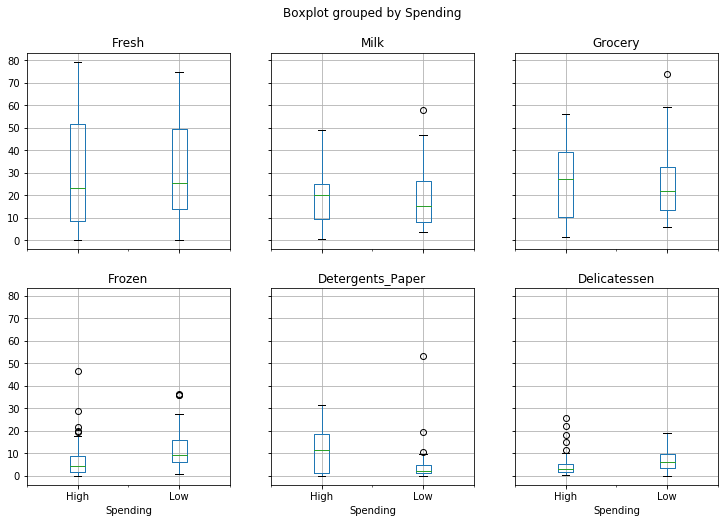

In [34]:
# Use boxplot with param: by='Spending', figsize=(12, 8), layout=(2, 3)
# Your code here


The main difference between purchasing habits in groups appears on variables **Frozen, Detergents_Paper and Delicatessen**. Clients that spend more tend to buy more (relatively speaking) on Detergents and Paper and less on Frozen Goods and Delicatessen than clients spending less.

## PCA

**Normalization** is important in **PCA** since it is a variance maximizing exercise. It projects your original data onto directions which maximize the variance. So we need to scale our data first.

In [79]:
# Import scale from sklearn.preprocessing
from sklearn.preprocessing import scale

# Scale data and called it as X
X = pd.DataFrame(scale(data), index=data.index, columns=data.columns)
X.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [82]:
# Import PCA
from sklearn.decomposition import PCA

# Apply PCA by fitting the scaled data with the same number of dimensions as features
pca = PCA(n_components = 6)
pca.fit(X)

print(pca.components_)

[[ 0.04288396  0.54511832  0.57925635  0.05118859  0.5486402   0.24868198]
 [ 0.52793212  0.08316765 -0.14608818  0.61127764 -0.25523316  0.50420705]
 [-0.81225657  0.06038798 -0.10838401  0.17838615 -0.13619225  0.52390412]
 [-0.23668559 -0.08718991  0.10598745  0.76868266  0.17174406 -0.55206472]
 [-0.04868278  0.82657929 -0.31499943 -0.02793224 -0.33964012 -0.31470051]
 [-0.03602539 -0.03804019  0.72174458 -0.01563715 -0.68589373 -0.07513412]]


In [113]:
# pca_loadings
pca_loadings = pd.DataFrame(pca.components_.T, index=X.columns,
                            columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6'])

# Transform X using the PCA fit above
pca_data = pd.DataFrame(pca.fit_transform(X),
                        columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
                        index=X.index)

### Analyzing PCA Samples

### Visualizing a Biplot

In [114]:
def biplot(origin_data, reduced_data, pca):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.
    
    origin_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute

    return: a matplotlib AxesSubplot object (for any additional customization)
    
    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'PC1'], y=reduced_data.loc[:, 'PC2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, origin_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

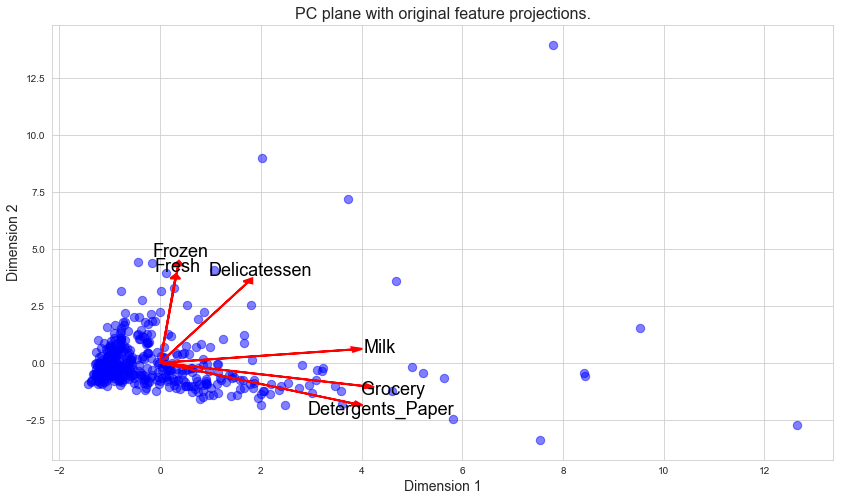

In [115]:
# Using provided biplot function to make a biplot
biplot(data, pca_data, pca)

### Choosing the number of components
A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

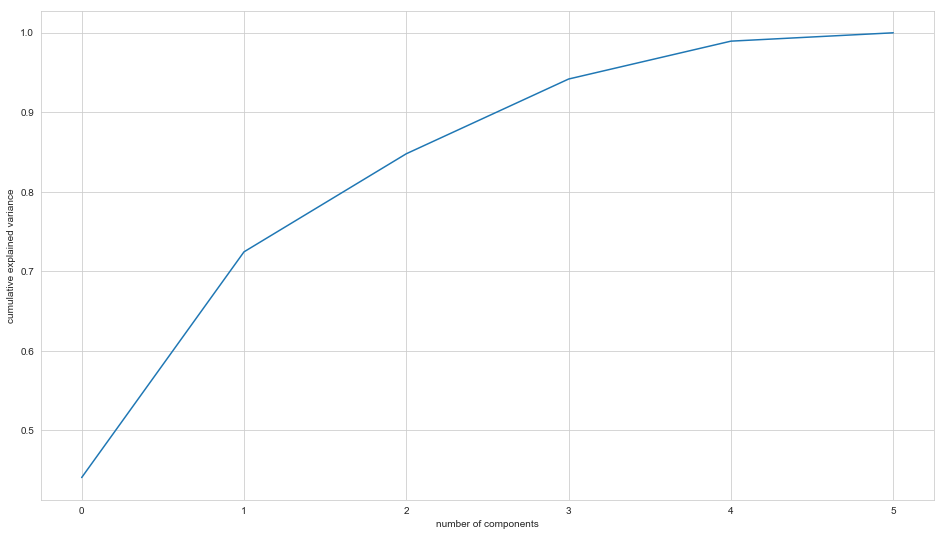

In [116]:
# Your code here
sns.set_style('whitegrid')

pca = PCA().fit(pca_data)
plt.figure(figsize=(16, 9))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#3 components explains 95% of the variance

## Clustering

### K-Means

To use K-Means algorithms we need to define K value first. One way to choose K value, we use elbow algorithms

In [131]:
# Import KMeans from sklearn
from sklearn.cluster import KMeans

# Choose the range of k value we want to test (1 - 20)
k_values = (1:20)

# For each value of K, we create a KMeans model and save in k_mean_models
k_mean_models = KMeans(n_clusters=k_values)


# For each Models, we fit with scaled data and calculate score
scores = k_mean_models.fit(pca_data)

norm_scores = [score/max(scores) for score in scores]

plt.plot(k_values, norm_scores, '-o')
plt.xlabel('k')
plt.ylabel('score');

SyntaxError: invalid syntax (<ipython-input-131-d4604c0c289e>, line 5)

### Hierarchical

In [117]:
# Import dendrogram, linkage from scipy.cluster.hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

In [119]:
# generate the linkage matrix
Z = linkage(pca_data, 'ward')

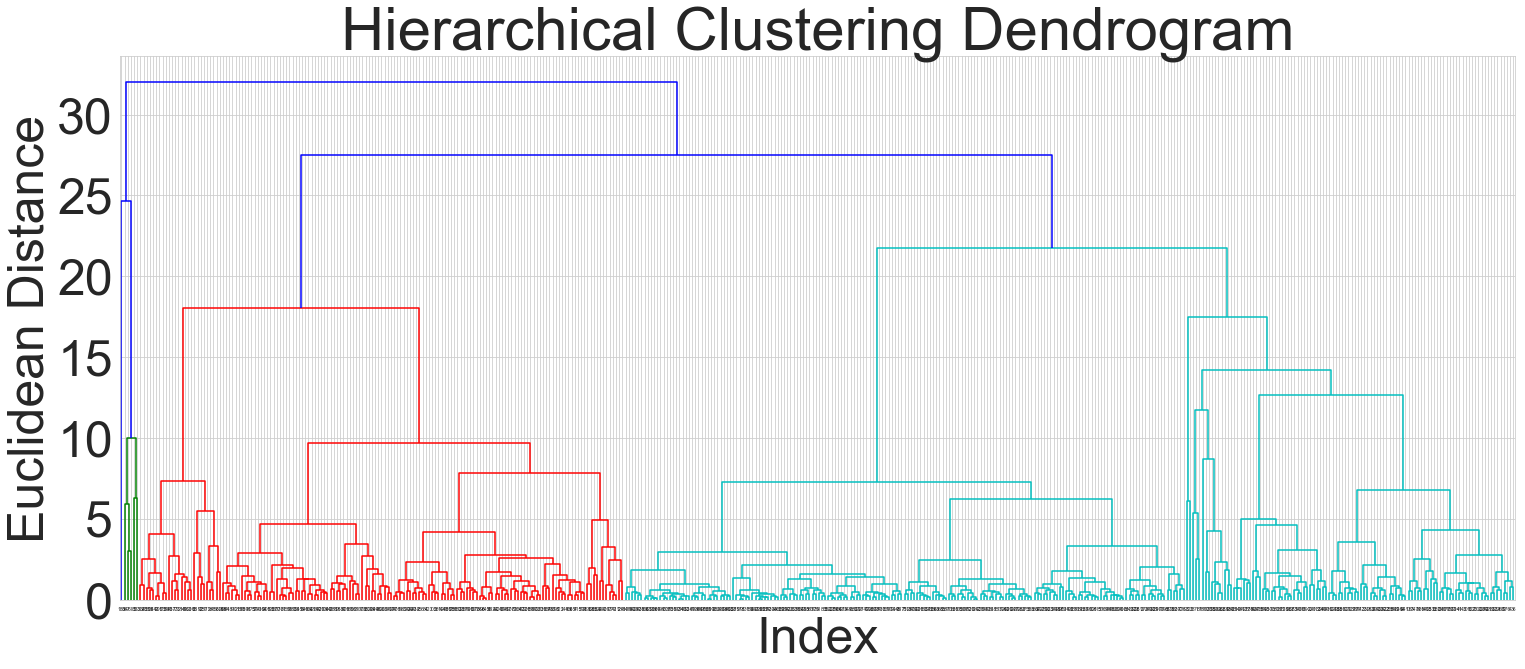

In [120]:
# calculate full dendrogram
# Hint: refer to lecture notebook
fig = plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram', fontsize=60)
plt.xlabel('Index', fontsize=50)
plt.ylabel('Euclidean Distance', fontsize=50)
plt.xticks(fontsize=5)
plt.yticks(fontsize=50)

ax = dendrogram(
    Z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=5.,  # font size for the x axis labels
    labels=range(len(X)),
)


In [123]:
# To apply hierarchical in product, we use AgglomerativeClustering
# in sklearn package instead of scipy
# so import it first
from sklearn.cluster import AgglomerativeClustering

# Create AgglomerativeClustering model with n_clusters equals to the number of cluster
# you think it's the best one
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage ='ward')

# fit model with scaled data
y_hc = cluster.fit_predict(pca_data)

In [134]:
# Plot out result using scatter using the first 2 components of PCA
fig = plt.figure(figsize=(25, 10))

plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.show()

TypeError: unhashable type: 'slice'

<Figure size 1800x720 with 0 Axes>

## Great job!!!